In [2]:
import pandas as pd #verileri düzgün şekilde tutabilmek içindir(dataframe içerisinde)
import numpy as np #büyük sayılar ve hesaplama işlemleri için kullanılır
import matplotlib.pyplot as plt #çizim için kullanılır

In [3]:
#çift tırnakta olur tekte
veriler=pd.read_csv('maaslar.csv')
#pd.read_csv("veriler.csv")

In [4]:
#data frame slicing(dilimlemek=bir kolonu/dilimi kesiyoruz)
x = veriler.iloc[:,1:2]
y=veriler.iloc[:,2:]

#Numpy array(dizi) dönüşümü
X=x.values
Y=y.values

In [5]:
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [7]:
#linear regression / dogrusal model olusturma

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


LinearRegression()

In [8]:
# polynomial regression 
# dogrusal olmayan (nonLinear model) olusturma
# 2. dereceden polinom
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [9]:
# 4. dereceden polinom
poly_reg3 = PolynomialFeatures(degree=4)
x_poly3 = poly_reg3.fit_transform(X)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly3,y)

LinearRegression()

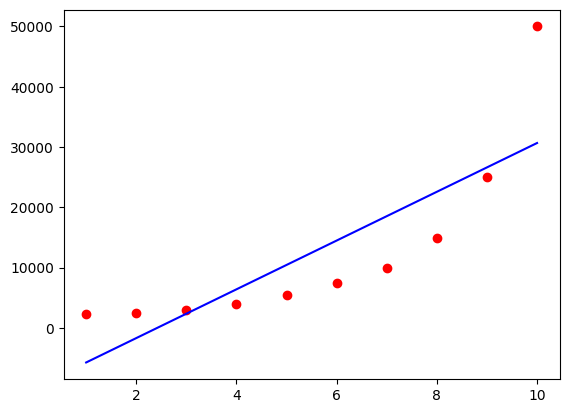

In [10]:
# Veri Görselleştirmeleri
plt.scatter(X,Y, color='red')
plt.plot(X,lin_reg.predict(X), color = 'blue')
plt.show()

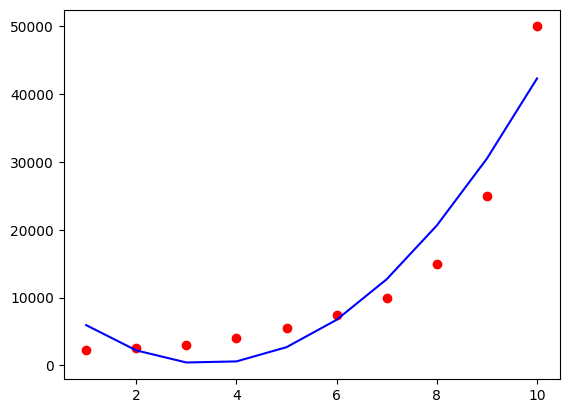

In [11]:
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.show()

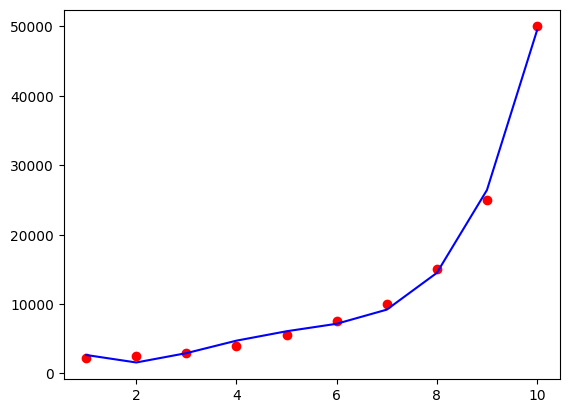

In [12]:
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg3.predict(poly_reg3.fit_transform(X)),color='blue')
plt.show()

In [13]:
#tahminler
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


In [14]:
print(lin_reg2.predict(poly_reg.fit_transform(([[6.6]]))))
print(lin_reg2.predict(poly_reg.fit_transform(([[11]]))))

[[10083.33333333]]
[[56091.66666667]]


In [15]:
# verilerin olceklenmesi / scaling

from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)

sc2 = StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))


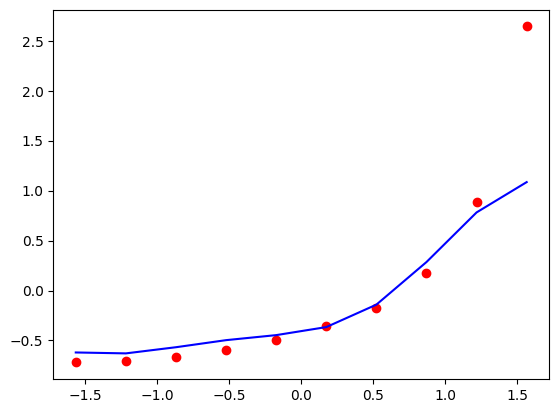

In [16]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli, color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')
plt.show()

In [17]:
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))


[0.01150915]
[0.01150915]


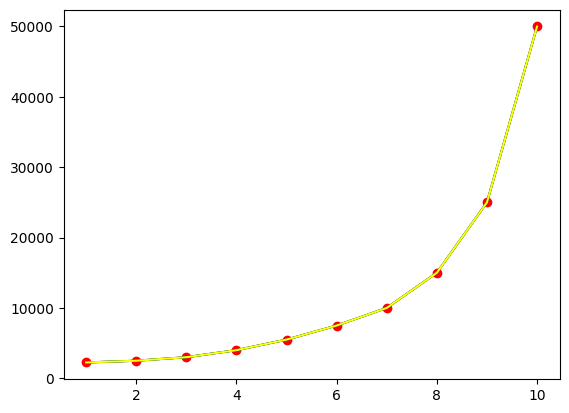

[50000.]
[10000.]


In [21]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

Z = X + 0.5
K = X - 0.4

plt.scatter(X,Y, color = 'red')
plt.plot(x, r_dt.predict(X), color ='blue')

plt.plot(x,r_dt.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')

plt.show()
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0, n_estimators=10)
rf_reg.fit(X,Y.ravel())

c:\Users\zeyne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [27]:
print(rf_reg.predict([[6.6]]))

[10500.]


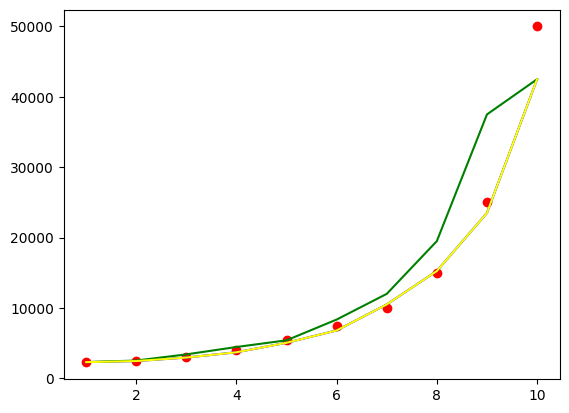

In [33]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,rf_reg.predict(X),color = 'blue')

plt.plot(X,rf_reg.predict(Z),color='green')
plt.plot(X,rf_reg.predict(K),color='yellow')
